# Data

This notebook is an initial exploration of ASPECT data, including initial attempts to load data into *yt*. 

ASPECT output from: 
Data source: [DOI 10.17605/OSF.IO/TEJM4](https://osf.io/tejm4/)
Title: Edge-Driven Convection and Mantle Wind Models Beneath Madagascar
Authors: Tahiry Rajaonarison, Sarah Stamps, Stewart Fishwick, Sascha Brune, Anne Glerum, Jiashun Hu 

To run notebook: download and unpack, set environment variable "ASPECTdatadir" to the directory containing the unzipped directory



# Data Format


Standard ASPECT output is in the form of `.pvtu` and `.vtu` files. For a single time step on multiple processors, the files look like:

```
solution-00022.0000.vtu
solution-00022.0001.vtu
solution-00022.0002.vtu
solution-00022.0003.vtu
solution-00022.0004.vtu
solution-00022.0005.vtu
solution-00022.0006.vtu
solution-00022.0007.vtu
solution-00022.0008.vtu
solution-00022.0009.vtu
solution-00022.0010.vtu
solution-00022.0011.vtu
solution-00022.0012.vtu
solution-00022.0013.vtu
solution-00022.0014.vtu
solution-00022.0015.vtu
solution-00022.pvtu
```

The `.vtu` files are the output from each processor, which handles a different part of the unstructured mesh. The `.pvtu` file is a plain text xml file, e.g.: 

```
<?xml version="1.0"?>
<!--
#This file was generated by the deal.II library on 2018/9/13 at 18:17:01
-->
<VTKFile type="PUnstructuredGrid" version="0.1" byte_order="LittleEndian">
  <PUnstructuredGrid GhostLevel="0">
    <PPointData Scalars="scalars">
    <PDataArray type="Float64" Name="velocity" NumberOfComponents="3" format="ascii"/>
    <PDataArray type="Float64" Name="p" format="ascii"/>
    <PDataArray type="Float64" Name="T" format="ascii"/>
    <PDataArray type="Float64" Name="crust" format="ascii"/>
    <PDataArray type="Float64" Name="mantle_lithosphere" format="ascii"/>
    <PDataArray type="Float64" Name="viscosity" format="ascii"/>
    <PDataArray type="Float64" Name="density" format="ascii"/>
    <PDataArray type="Float64" Name="strain_rate" format="ascii"/>
    <PDataArray type="Float64" Name="velocity_inclination" format="ascii"/>
    </PPointData>
    <PPoints>
      <PDataArray type="Float64" NumberOfComponents="3"/>
    </PPoints>
    <Piece Source="solution-00022.0000.vtu"/>
    <Piece Source="solution-00022.0001.vtu"/>
    <Piece Source="solution-00022.0002.vtu"/>
    <Piece Source="solution-00022.0003.vtu"/>
    <Piece Source="solution-00022.0004.vtu"/>
    <Piece Source="solution-00022.0005.vtu"/>
    <Piece Source="solution-00022.0006.vtu"/>
    <Piece Source="solution-00022.0007.vtu"/>
    <Piece Source="solution-00022.0008.vtu"/>
    <Piece Source="solution-00022.0009.vtu"/>
    <Piece Source="solution-00022.0010.vtu"/>
    <Piece Source="solution-00022.0011.vtu"/>
    <Piece Source="solution-00022.0012.vtu"/>
    <Piece Source="solution-00022.0013.vtu"/>
    <Piece Source="solution-00022.0014.vtu"/>
    <Piece Source="solution-00022.0015.vtu"/>
  </PUnstructuredGrid>
</VTKFile>
```

The `PDataArray` entries describe the avaiable fields, the `Piece Source` entries point to the individual processor files that comprise the full mesh.

# Reference Plots with *visit*
*visit* (https://wci.llnl.gov/simulation/computer-codes/visit) is commonly used by ASPECT users, so here are some screen shots of loading the above data to get an initial sense of what is there.


## a single `.vtu` file 

For example, here's a visualization of the mesh from a single `.vtu` file loaded using *visit*

![partialMesh](resources/visitScreenshot_vtu.png)


## loading the full `.pvtu` file 

In *visit*, when you load the `.pvtu` file it collects the pieces from all the processors : 

![fullMesh](resources/visitScreenshot_fullMesh.png)


## rendering a field variable from the full `.pvtu` file 

And here is an example of visualizing the temperature field: 

![visitTemp](resources/visitScreenshot_T.png)

# Exploring ASPECT output with *meshio* and *xmltodict*

In [1]:
import os, yt, numpy as np
import xmltodict, meshio 

%matplotlib notebook
import matplotlib.pyplot as plt 

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [2]:
DataDir=os.path.join(os.environ.get('ASPECTdatadir','../'),'edc_driven_convection_madagascar',
                     'edc_driven_convection_madagascar','solution')

In [3]:
pFile=os.path.join(DataDir,'solution-00005.pvtu')
if os.path.isfile(pFile) is False:
    print("data file not found")
    
# parse the multiprocessory summary file
with open(pFile) as data:
    pXML = xmltodict.parse(data.read())
    
# pull out a single processor .vtu file 
sFile=pXML['VTKFile']['PUnstructuredGrid']['Piece'][0]['@Source']
sFile=os.path.join(DataDir,sFile)

# *meshio*: loading a single .vtu file


In [4]:
sP=meshio.read(sFile)

In [5]:
dir(sP)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'cell_data',
 'cell_data_dict',
 'cell_sets',
 'cell_sets_dict',
 'cells',
 'cells_dict',
 'field_data',
 'get_cell_data',
 'get_cells_type',
 'gmsh_periodic',
 'info',
 'int_data_to_sets',
 'point_data',
 'point_sets',
 'points',
 'prune',
 'read',
 'sets_to_int_data',
 'write']

**connectivity info is in cells:**

In [6]:
len(sP.cells)

8

In [7]:
# cells are further subdivided 
sP.cells[0]

CellBlock(type='hexahedron', data=array([[    0,     1,     3, ...,     5,     7,     6],
       [    8,     9,    11, ...,    13,    15,    14],
       [   16,    17,    19, ...,    21,    23,    22],
       ...,
       [17448, 17449, 17451, ..., 17453, 17455, 17454],
       [17456, 17457, 17459, ..., 17461, 17463, 17462],
       [17464, 17465, 17467, ..., 17469, 17471, 17470]], dtype=int32))

In [8]:
sP.cells[0].data

array([[    0,     1,     3, ...,     5,     7,     6],
       [    8,     9,    11, ...,    13,    15,    14],
       [   16,    17,    19, ...,    21,    23,    22],
       ...,
       [17448, 17449, 17451, ..., 17453, 17455, 17454],
       [17456, 17457, 17459, ..., 17461, 17463, 17462],
       [17464, 17465, 17467, ..., 17469, 17471, 17470]], dtype=int32)

In [9]:
sP.cells[0].data.shape

(2184, 8)

In [10]:
# a single hexahedron voxel connectivity
sP.cells[0].data[0]

array([0, 1, 3, 2, 4, 5, 7, 6], dtype=int32)

In [11]:
# coordinate info in points
sP.points

array([[ 4251470.30616899,  2976911.55685427, -2759618.16365957],
       [ 4256644.64687846,  2980534.6692243 , -2762976.81456819],
       [ 4235170.61707754,  3000055.33712502, -2759618.16365957],
       ...,
       [ 4034124.13830093,  4450970.08761739, -1317999.8246718 ],
       [ 4005123.50922364,  4467703.30644549, -1316466.6335507 ],
       [ 4009787.97974399,  4472906.50937258, -1317999.8246718 ]])

In [12]:
sP.points.shape

(139840, 3)

In [13]:
# actual field data is in point_data
sP.point_data

{'velocity': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.36602708e-05, -4.45754013e-05,  4.13217131e-05],
        [-2.49424018e-04,  3.52111267e-04,  0.00000000e+00],
        ...,
        [ 1.28487940e-03,  4.28326806e-04, -1.42322489e-04],
        [ 1.25289906e-03,  6.92421920e-04, -1.30072774e-04],
        [ 1.24936993e-03,  5.90830517e-04, -1.02484053e-04]]),
 'p': array([1.40637481e+10, 1.38452081e+10, 1.40637164e+10, ...,
        5.68988006e+09, 5.91218483e+09, 5.68990310e+09]),
 'T': array([1840.6965332 , 1837.11938477, 1842.52648926, ..., 1727.26367188,
        1731.66894531, 1728.08190918]),
 'crust': array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -9.98153837e-21, -2.04027511e-21, -1.05621820e-20]),
 'mantle_lithosphere': array([-2.03886474e-38, -6.02088624e-38,  9.18995635e-39, ...,
         7.86181762e-14,  2.24783113e-14,  1.12801885e-13]),
 'viscosity': array([6.35352495e+20, 6.19644573e+20, 6.70766269e+20, ...,
        1.

In [14]:
# data at nodes is in coordinate order
sP.point_data['T'].shape

(139840,)

In [15]:
# pull some values for a node set
print(sP.point_data.keys())
sampleNodes=sP.cells[0].data[0]

print(sampleNodes)

print("sample T:")
print(sP.point_data['T'][sampleNodes])

print("\nsample xyz:")
print(sP.points[sampleNodes])

dict_keys(['velocity', 'p', 'T', 'crust', 'mantle_lithosphere', 'viscosity', 'density', 'strain_rate', 'velocity_inclination'])
[0 1 3 2 4 5 7 6]
sample T:
[1840.6965332  1837.11938477 1838.94946289 1842.52648926 1841.03149414
 1837.45446777 1839.43432617 1842.80651855]

sample xyz:
[[ 4251470.30616899  2976911.55685427 -2759618.16365957]
 [ 4256644.64687846  2980534.6692243  -2762976.81456819]
 [ 4240325.11991004  3003706.61711608 -2762976.81456819]
 [ 4235170.61707754  3000055.33712502 -2759618.16365957]
 [ 4263736.37976591  2985500.35405107 -2731269.72497969]
 [ 4268925.64915637  2989133.91959607 -2734593.87382908]
 [ 4252559.03811952  3012372.72172832 -2734593.87382908]
 [ 4247389.663841    3008710.90729485 -2731269.72497969]]


[0 1 3 2 4 5 7 6]
[1840.6965332  1837.11938477 1838.94946289 1842.52648926 1841.03149414
 1837.45446777 1839.43432617 1842.80651855]
[[ 4251470.30616899  2976911.55685427 -2759618.16365957]
 [ 4256644.64687846  2980534.6692243  -2762976.81456819]
 [ 4240325.11991004  3003706.61711608 -2762976.81456819]
 [ 4235170.61707754  3000055.33712502 -2759618.16365957]
 [ 4263736.37976591  2985500.35405107 -2731269.72497969]
 [ 4268925.64915637  2989133.91959607 -2734593.87382908]
 [ 4252559.03811952  3012372.72172832 -2734593.87382908]
 [ 4247389.663841    3008710.90729485 -2731269.72497969]]


<IPython.core.display.Javascript object>


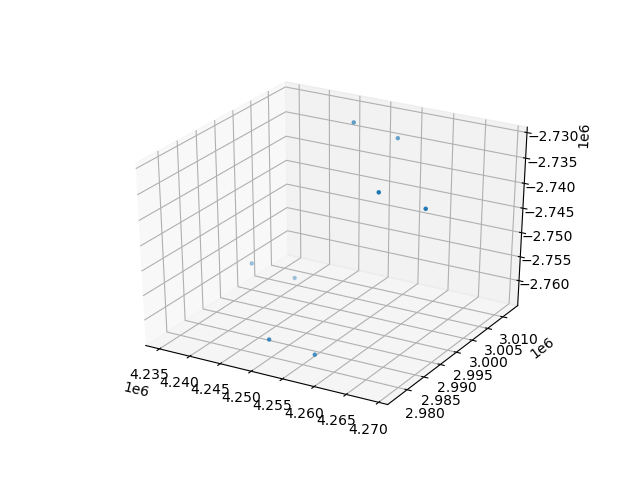

<IPython.core.display.Javascript object>


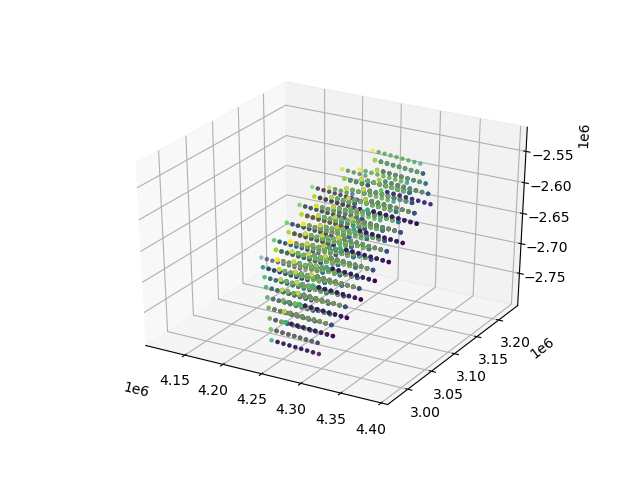

In [16]:
# some manual plotting of the mesh 

sampleNodes=sP.cells[0].data[0] # a single element's vertices 
Tvals=sP.point_data['T'][sampleNodes] # field values at those vertices 
crds=sP.points[sampleNodes] # coordinates of those vertices 
X=crds[:,0]
Y=crds[:,1]
Z=crds[:,2]

print(sampleNodes)
print(Tvals)
print(crds)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,Z,marker='.')
plt.show()

# plotting many elements in a cell block 
sampleNodes=sP.cells[0].data[0:400]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for nds in sampleNodes:
    crds=sP.points[nds]
    X=crds[:,0]
    Y=crds[:,1]
    Z=crds[:,2]
    Tvals=sP.point_data['T'][nds]
    ax.scatter(X,Y,Z,marker='.',c=Tvals)
    
plt.show()    

<IPython.core.display.Javascript object>


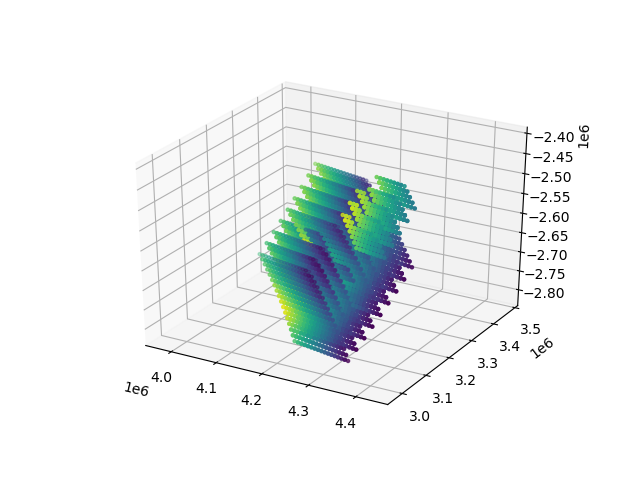

In [17]:
# same as above, but in a way yt will like 

# connectivity array for a single cell bock, 0: 
connectivity=sP.cells[0].data

# pull out the coords for each vertex: 
coords=sP.points[connectivity.min():connectivity.max()+1]

# pull out the data for each vertex then reshape to match connectivity array 
pt_data=sP.point_data['T'][connectivity.ravel()]
pt_data=np.reshape(pt_data,connectivity.shape)
node_data = {("connect1", "T") : pt_data.astype("f8")}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X=coords[:,0]
Y=coords[:,1]
Z=coords[:,2]
Tvals=node_data[("connect1", "T")].ravel()
ax.scatter(X,Y,Z,marker='.',c=Tvals)    
plt.show()    



## loading a single cell block into *yt*

`yt.load_unstructured_mesh(connectivity,coordinates,node_data={}`

from `load_unstructured_mesh` docstring: 
* connectivity (list of array_like or array_like) – This should either be a single 2D array or list of 2D arrays. If this is a list, each element in the list corresponds to the connectivity information for a distinct mesh. Each array can have different connectivity length and should be of shape (N,M) where N is the number of elements and M is the number of vertices per element.
* coordinates (array_like) – The 3D coordinates of mesh vertices. This should be of size (L, D) where L is the number of vertices and D is the number of coordinates per vertex (the spatial dimensions of the dataset). Currently this must be either 2 or 3. When loading more than one mesh, the data for each mesh should be concatenated into a single coordinates array.
* node_data (dict or list of dicts) – For a single mesh, a dict mapping field names to 2D numpy arrays, representing data defined at element vertices. For multiple meshes, this must be a list of dicts. Note that these are not the values as a function of the coordinates, but of the connectivity. Their shape should be the same as the connectivity. This means that if the data is in the shape of the coordinates, you may need to reshape them using the connectivity array as an index.

In [18]:
print("connectivity shape and size")
print(connectivity.shape)
print(connectivity.size)

print("coordinates shape")
print(coords.shape)

print("node data shape")
print(node_data[("connect1", 'T')].shape)

# now load it in 
ds = yt.load_unstructured_mesh(
    connectivity.astype("i8"),
    coords.astype("f8"),
    node_data = node_data
)

yt : [INFO     ] 2020-07-02 10:38:59,652 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-07-02 10:38:59,652 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-07-02 10:38:59,653 Parameters: domain_left_edge          = [ 3578253.51624149  2679220.40116884 -3094692.23601728]
yt : [INFO     ] 2020-07-02 10:38:59,654 Parameters: domain_right_edge         = [ 4876256.0411066   3824405.37329946 -2172835.51573034]
yt : [INFO     ] 2020-07-02 10:38:59,654 Parameters: cosmological_simulation   = 0.0


connectivity shape and size
(2184, 8)
17472
coordinates shape
(17472, 3)
node data shape
(2184, 8)


yt : [INFO     ] 2020-07-02 10:38:59,798 xlim = 3578253.516241 4876256.041107
yt : [INFO     ] 2020-07-02 10:38:59,798 ylim = 2679220.401169 3824405.373299
yt : [INFO     ] 2020-07-02 10:38:59,799 xlim = 3578253.516241 4876256.041107
yt : [INFO     ] 2020-07-02 10:38:59,799 ylim = 2679220.401169 3824405.373299
yt : [INFO     ] 2020-07-02 10:38:59,800 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800


[unyt_quantity(4227254.77867404, 'code_length'), unyt_quantity(3251812.88723415, 'code_length')]
center-window



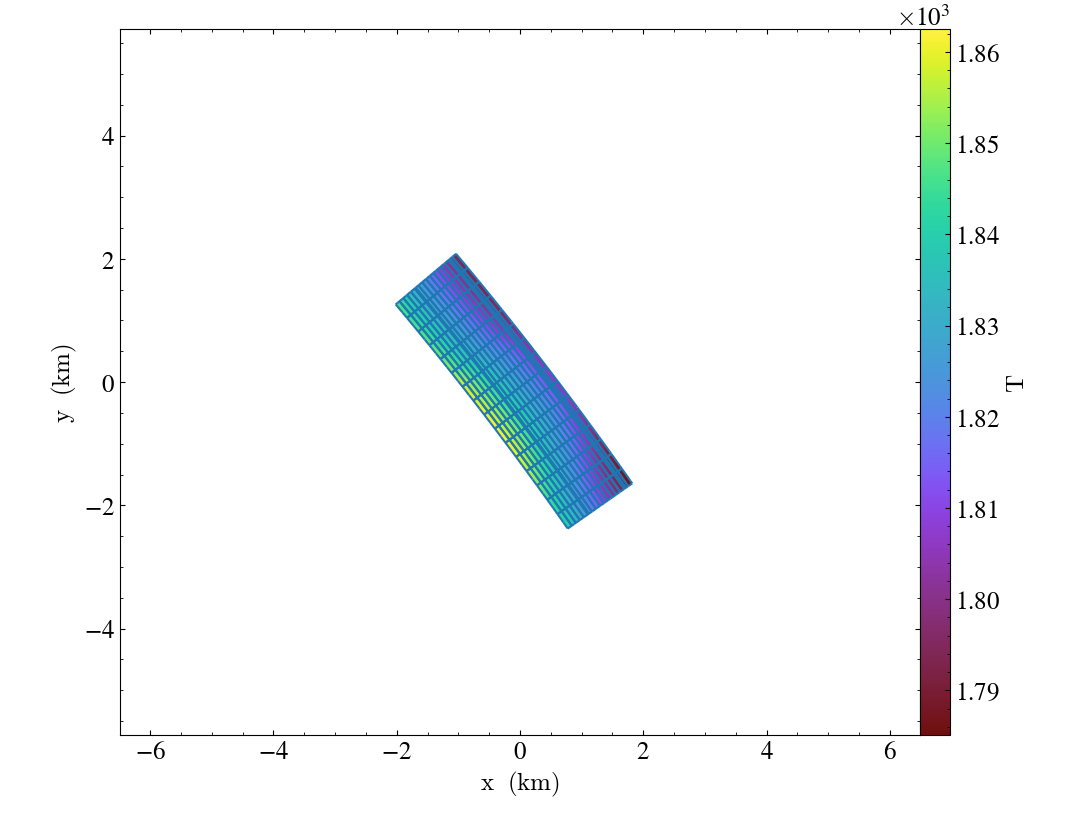

In [19]:
slc=yt.SlicePlot(ds, "z", ("connect1", "T")).annotate_mesh_lines()
slc.set_log("T",False)
print(slc.center)
print(slc.origin)
slc.show()

yt : [INFO     ] 2020-07-02 10:39:00,316 xlim = 3578253.516241 4876256.041107
yt : [INFO     ] 2020-07-02 10:39:00,316 ylim = 2679220.401169 3824405.373299
yt : [INFO     ] 2020-07-02 10:39:00,317 xlim = 3578253.516241 4876256.041107
yt : [INFO     ] 2020-07-02 10:39:00,317 ylim = 2679220.401169 3824405.373299
yt : [INFO     ] 2020-07-02 10:39:00,318 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800



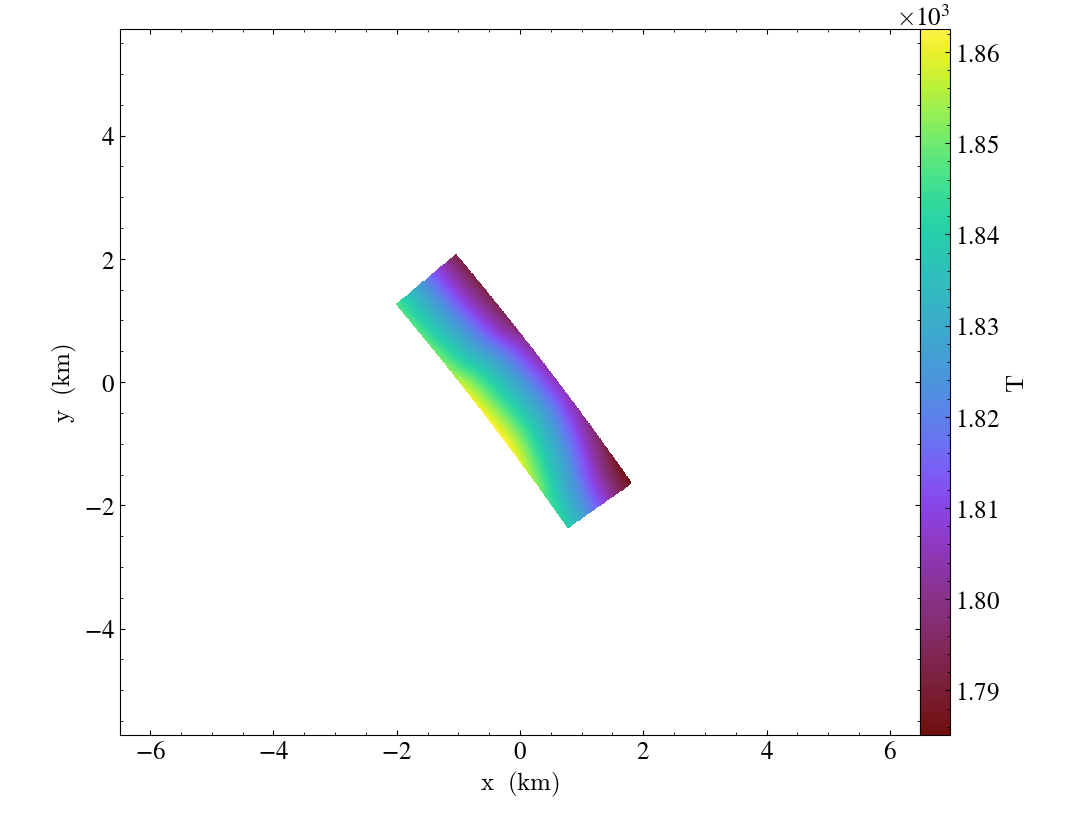

In [20]:
slc=yt.SlicePlot(ds, "z", ("connect1", "T"))
slc.set_log("T",False)
slc.show()


## load full single vtu file (still one processor's data)

In [21]:
try:
    nCells=len(sP.cells)
except: 
    sP=meshio.read(sFile)
    nCells=len(sP.cells)

# let's load a single cell block and field into yt
print("there are {nCells} CellBlocks in this vtu".format(nCells=nCells))

there are 8 CellBlocks in this vtu


In [22]:
# cell block cell data does not contain duplicates
a,c=np.unique(sP.cells[0].data,return_counts=True)
print(len(c[c>1]))

# because the point data is repeated 
a,c=np.unique(sP.points,return_counts=True)
print(len(c[c>1]))


0
51417


In [23]:
# flatten the cell blocks into single connectivity
connectivity=[]
for cB in sP.cells:         
    connectivity.extend(cB.data)
connectivity=np.array(connectivity)

# coords are already global 
coords=sP.points

# pull out point_data and reshape to same as connectivity 
node_data = {("connect1", "T") : np.reshape(sP.point_data['T'],connectivity.shape).astype("f8")} # breaks for vectors with components

print("connectivity shape and size")
print(connectivity.shape)
print(connectivity.size)

print("coordinates shape")
print(coords.shape)

print("node data shape")
print(node_data[("connect1", 'T')].shape)


ds = yt.load_unstructured_mesh(
    connectivity.astype("i8"),
    coords.astype("f8"),
    node_data = node_data 
)    


yt : [INFO     ] 2020-07-02 10:39:00,763 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-07-02 10:39:00,764 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-07-02 10:39:00,764 Parameters: domain_left_edge          = [ 2942087.77597532  2679220.40116884 -3242472.87599667]
yt : [INFO     ] 2020-07-02 10:39:00,765 Parameters: domain_right_edge         = [ 5160369.30842531  5562836.63343369 -1001632.35358264]
yt : [INFO     ] 2020-07-02 10:39:00,765 Parameters: cosmological_simulation   = 0.0


connectivity shape and size
(17480, 8)
139840
coordinates shape
(139840, 3)
node data shape
(17480, 8)


In [24]:
ds.dimensionality

3

yt : [INFO     ] 2020-07-02 10:39:00,906 xlim = 2942087.775975 5160369.308425
yt : [INFO     ] 2020-07-02 10:39:00,907 ylim = 2679220.401169 5562836.633434
yt : [INFO     ] 2020-07-02 10:39:00,908 xlim = 2942087.775975 5160369.308425
yt : [INFO     ] 2020-07-02 10:39:00,908 ylim = 2679220.401169 5562836.633434
yt : [INFO     ] 2020-07-02 10:39:00,909 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800
/home/chavlin/src/yt/yt/visualization/plot_window.py:916: RuntimeWarning: All-NaN axis encountered
  elif np.nanmax(image) == np.nanmin(image):
/home/chavlin/src/yt/yt/visualization/plot_window.py:919: RuntimeWarning: All-NaN axis encountered
  elif np.nanmax(image) <= 0:
yt : [WARNING  ] 2020-07-02 10:39:00,924 Plot image for field ('connect1', 'T') is filled with NaNs.
yt : [WARNING  ] 2020-07-02 10:39:00,925 Switching to linear colorbar scaling.


[unyt_quantity(4051228.54220032, 'code_length'), unyt_quantity(4121028.51730127, 'code_length')]



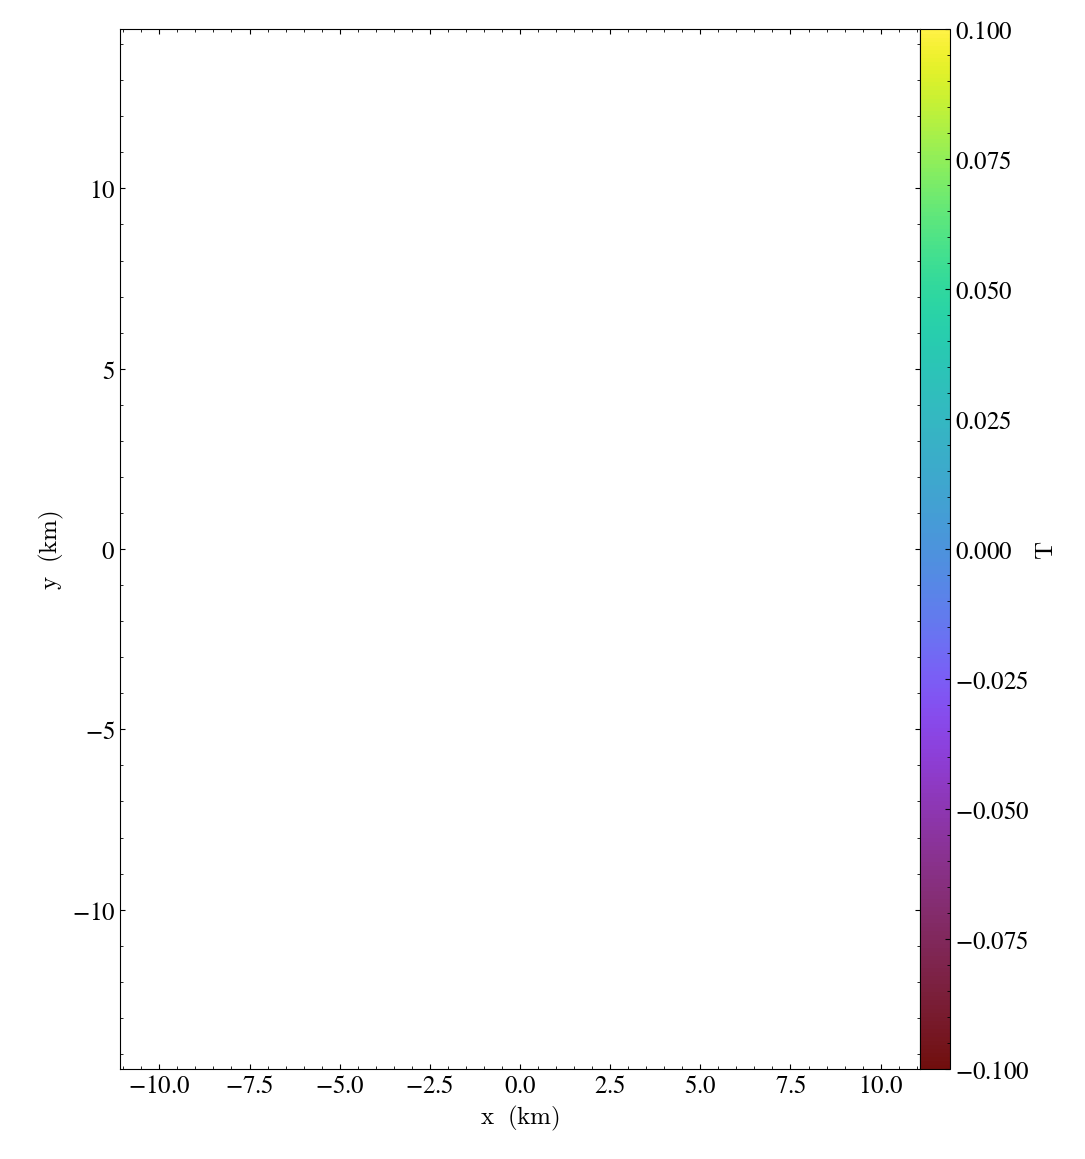

In [25]:
p=yt.SlicePlot(ds, axis="z", fields=("connect1", "T"))
print(p.center)
p.set_log("T",False)
p.show()


yt : [INFO     ] 2020-07-02 10:39:01,305 xlim = 2679220.401169 5562836.633434
yt : [INFO     ] 2020-07-02 10:39:01,305 ylim = -3242472.875997 -1001632.353583
yt : [INFO     ] 2020-07-02 10:39:01,306 xlim = 2679220.401169 5562836.633434
yt : [INFO     ] 2020-07-02 10:39:01,306 ylim = -3242472.875997 -1001632.353583
yt : [INFO     ] 2020-07-02 10:39:01,307 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800



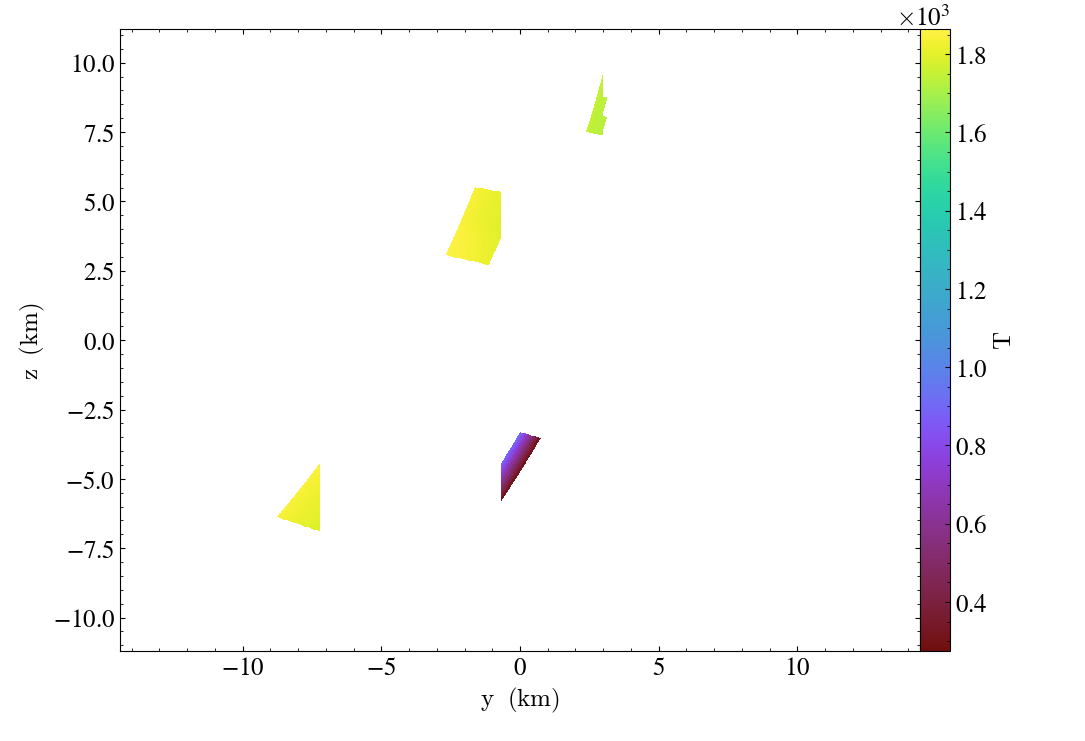

In [26]:
p=yt.SlicePlot(ds, "x", ("connect1", "T"))
p.set_log("T",False)
p.show()

**The above doesn't look good -- but** a single `.vtu` file is not guaranteed to have continuous sequences of the total mesh, so the slicing may be sampling regions with no data? Need to load all the data to confirm, but first: 

## comparison of vtu files:

do indeces reset across files? 



In [27]:
file_1=os.path.join(DataDir,pXML['VTKFile']['PUnstructuredGrid']['Piece'][0]['@Source'])
file_2=os.path.join(DataDir,pXML['VTKFile']['PUnstructuredGrid']['Piece'][1]['@Source'])

sP_1=meshio.read(file_1)
sP_2=meshio.read(file_2)

def flattenCon(sPin):
    connectivity=[]
    for cB in sPin.cells:     
        connectivity.extend(cB.data)
    return np.array(connectivity)
    
con_1=flattenCon(sP_1)
con_2=flattenCon(sP_2)

print(con_1)
print(con_2)

[[     0      1      3 ...      5      7      6]
 [     8      9     11 ...     13     15     14]
 [    16     17     19 ...     21     23     22]
 ...
 [139816 139817 139819 ... 139821 139823 139822]
 [139824 139825 139827 ... 139829 139831 139830]
 [139832 139833 139835 ... 139837 139839 139838]]
[[     0      1      3 ...      5      7      6]
 [     8      9     11 ...     13     15     14]
 [    16     17     19 ...     21     23     22]
 ...
 [139816 139817 139819 ... 139821 139823 139822]
 [139824 139825 139827 ... 139829 139831 139830]
 [139832 139833 139835 ... 139837 139839 139838]]


**So need to offset connectivity indeces!!!!!!!!**

## load all the vtu files

The main difference between the *meshio* output and what `yt.load_unstructured_mesh()` expects is that *meshio* loads the field data as a 1D array the same length as the coordinate array, while `yt.load_unstructured_mesh()` expects `node_data` to be element-ordered. So for each `.vtu` file, we need to reshape that data. 

In [28]:
def loadPiece(srcFi,connectivity_offset=0): 
    sP=meshio.read(srcFi)
    
    # coords and node_data are already global, ordered, minor adjustments:
    coords=sP.points

    # flatten the cell blocks into single connectivity
    connectivity=[]
    for cB in sP.cells:     
        connectivity.extend(cB.data)
    connectivity=np.array(connectivity)

    FldData=np.reshape(sP.point_data['T'][connectivity.ravel()],connectivity.shape)
    node_data = {("connect1", "T") : FldData} # breaks for vectors with components
    
    connectivity=connectivity+connectivity_offset
    
    return [connectivity,coords,node_data]

coordlist=[]
conlist=[]
nodeDict={("connect1","T"):[]}
minz=[]
maxz=[]
previous_max_con=0
for src in pXML['VTKFile']['PUnstructuredGrid']['Piece']:
    srcFi=os.path.join(DataDir,src['@Source'])
    [con,coord,node_d]=loadPiece(srcFi,previous_max_con+1)
    previous_max_con=con.max() 
    
    coordlist.extend(coord)
    minz.append(np.array(coord[2]).min())
    maxz.append(np.array(coord[2]).max())

    initshape=np.array(conlist).shape
    conlist.extend(con)
    nodeDict[("connect1","T")].extend(node_d[("connect1","T")].tolist())

nodeDict[("connect1","T")]=np.array(nodeDict[("connect1","T")])
conlist=np.array(conlist)
coordlist=np.array(coordlist)
  
    

/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0000.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0001.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0002.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0003.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0004.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0005.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0006.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_

(262144, 8)
2097152
(2097152, 3)
(262144, 8)
2097152


<IPython.core.display.Javascript object>


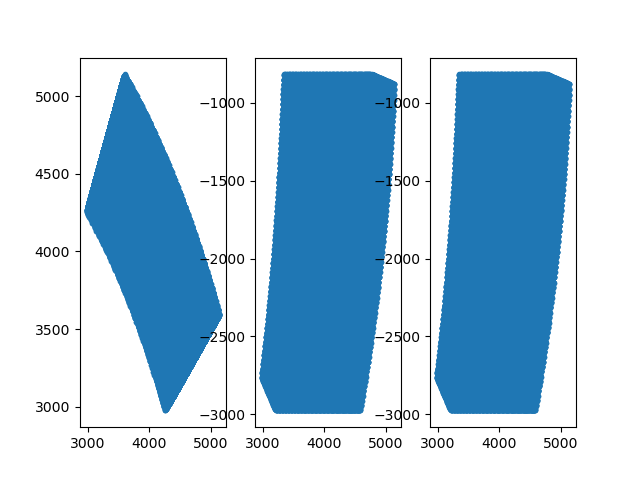

In [29]:
# just to confirm, let's check some shapes and make some matplotlib plots of the coordinates: 

print(conlist.shape)
print(conlist.size)
print(coordlist.shape)
print(nodeDict[("connect1","T")].shape)
print(nodeDict[("connect1","T")].size)

coordlist=coordlist/1000. # its in cm.... 
f=plt.figure()
plt.subplot(1,3,1)
plt.plot(coordlist[:,0],coordlist[:,1],'.')

plt.subplot(1,3,2)
plt.plot(coordlist[:,0],coordlist[:,2],'.')

plt.subplot(1,3,3)
plt.plot(coordlist[:,1],coordlist[:,2],'.')
plt.show()



Looks like the full mesh is being loaded and assembled correctly (again, not sure about units here). 

**so let's load it into** *yt*

In [30]:

ds = yt.load_unstructured_mesh(
    conlist.astype("i8"),
    coordlist.astype("f8"),
    node_data = nodeDict 
)  




yt : [INFO     ] 2020-07-02 10:39:04,691 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-07-02 10:39:04,691 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-07-02 10:39:04,692 Parameters: domain_left_edge          = [ 2679.22040117  2679.22040117 -3272.02900399]
yt : [INFO     ] 2020-07-02 10:39:04,692 Parameters: domain_right_edge         = [5653.60091489 5653.60091489 -736.27069874]
yt : [INFO     ] 2020-07-02 10:39:04,692 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2020-07-02 10:39:04,829 xlim = 2679.220401 5653.600915
yt : [INFO     ] 2020-07-02 10:39:04,830 ylim = -3272.029004 -736.270699
yt : [INFO     ] 2020-07-02 10:39:04,830 xlim = 2679.220401 5653.600915
yt : [INFO     ] 2020-07-02 10:39:04,831 ylim = -3272.029004 -736.270699
yt : [INFO     ] 2020-07-02 10:39:04,831 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800



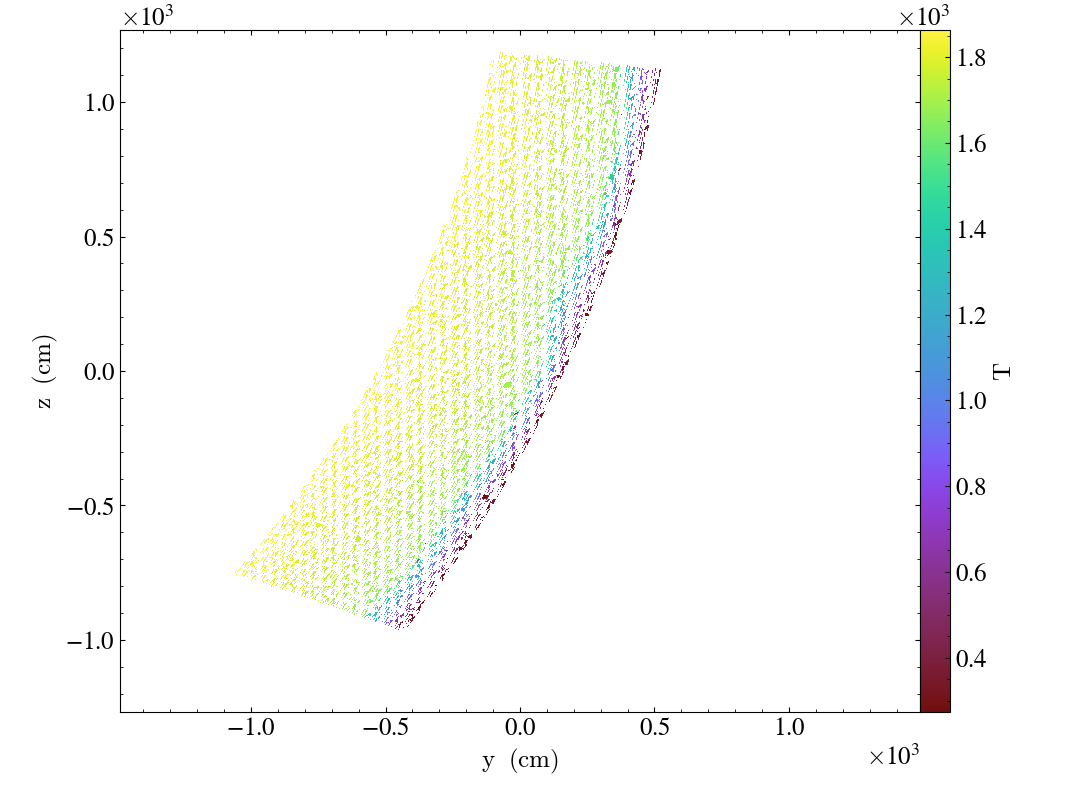

In [31]:
p=yt.SlicePlot(ds, "x", ("connect1", "T"))
p.set_log("T",False)
p.show()

yt : [INFO     ] 2020-07-02 10:39:14,169 xlim = 2679.220401 5653.600915
yt : [INFO     ] 2020-07-02 10:39:14,169 ylim = 2679.220401 5653.600915
yt : [INFO     ] 2020-07-02 10:39:14,170 xlim = 2679.220401 5653.600915
yt : [INFO     ] 2020-07-02 10:39:14,170 ylim = 2679.220401 5653.600915
yt : [INFO     ] 2020-07-02 10:39:14,171 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800



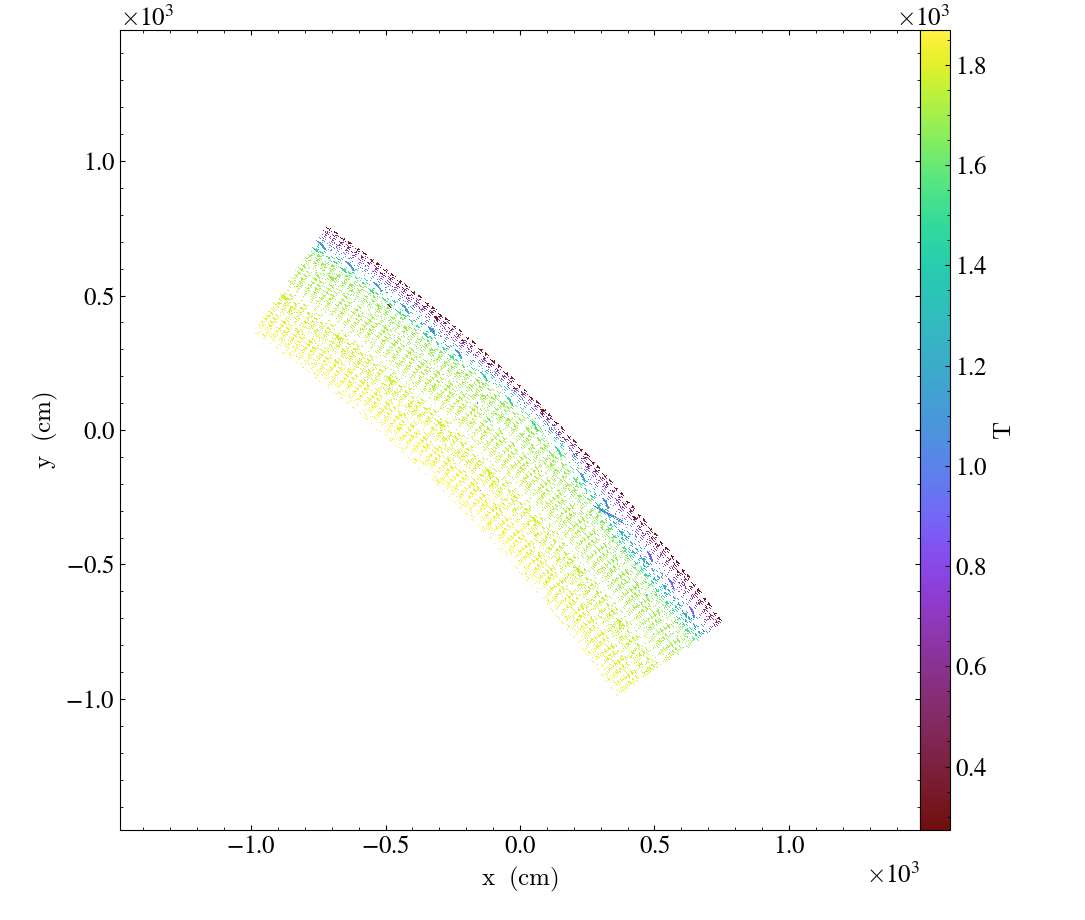

In [32]:
p=yt.SlicePlot(ds, "z", ("connect1", "T"))
p.set_log("T",False)
p.show()

Not sure about why the slice is not continuous.... 

## better loading

the above approach naively concatenates coordinates and data across files, which is probably not necessary since `yt.load_unstructured_mesh()` accepts LISTS of arrays for multiple meshes. So it should be possible to load each `.vtu` as a separate mesh and avoid some concatenation: 



In [33]:
# remember

print(yt.load_unstructured_mesh.__doc__)

Load an unstructured mesh of data into yt as a
    :class:`~yt.frontends.stream.data_structures.StreamHandler`.

    This should allow an unstructured mesh data to be loaded directly into
    yt and analyzed as would any others.  Not all functionality for
    visualization will be present, and some analysis functions may not yet have
    been implemented.

    Particle fields are detected as one-dimensional fields. The number of
    particles is set by the "number_of_particles" key in data.

    In the parameter descriptions below, a "vertex" is a 3D point in space, an
    "element" is a single polyhedron whose location is defined by a set of
    vertices, and a "mesh" is a set of polyhedral elements, each with the same
    number of vertices.

    Parameters
    ----------

    connectivity : list of array_like or array_like
        This should either be a single 2D array or list of 2D arrays.  If this
        is a list, each element in the list corresponds to the connectivity
       

In [34]:
def loadPiece(srcFi,mesh_name,connectivity_offset=0): 
    sP=meshio.read(srcFi)
    
    # coords and node_data are already global, ordered, minor adjustments:
    coords=sP.points

    # flatten the cell blocks into single connectivity
    connectivity=[]
    for cB in sP.cells:     
        connectivity.extend(cB.data)
    connectivity=np.array(connectivity)

    FldData=np.reshape(sP.point_data['T'][connectivity.ravel()],connectivity.shape)
    node_data = {(mesh_name, "T") : FldData} # breaks for vectors with components
    
    connectivity=connectivity+connectivity_offset
    return [connectivity,coords,node_data]

conlist=[]  # can be list of 2D arrays 
coordlist=[] # concantenate this as before 

nodeDictList=[] # For multiple meshes, this must be a list of dicts.
previous_max_con=-1
for mesh_id,src in enumerate(pXML['VTKFile']['PUnstructuredGrid']['Piece']):
    
    mesh_name="connect{meshnum}".format(meshnum=mesh_id+1)    
#     mesh_name="connect1"
    srcFi=os.path.join(DataDir,src['@Source'])
        
    [con,coord,node_d]=loadPiece(srcFi,mesh_name,previous_max_con+1)
    previous_max_con=con.max() 
    conlist.append(con.astype("i8"))
    coordlist.extend(coord.astype("f8"))
    nodeDictList.append(node_d)
     
ds2 = yt.load_unstructured_mesh(
    conlist,
    np.array(coordlist),
    node_data = nodeDictList
)  
 
len(conlist)
len(nodeDictList)




yt : [INFO     ] 2020-07-02 10:39:21,477 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-07-02 10:39:21,477 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-07-02 10:39:21,478 Parameters: domain_left_edge          = [ 2679220.40116885  2679220.40116884 -3272029.00399254]
yt : [INFO     ] 2020-07-02 10:39:21,478 Parameters: domain_right_edge         = [5653600.91489411 5653600.91489411 -736270.69874229]
yt : [INFO     ] 2020-07-02 10:39:21,479 Parameters: cosmological_simulation   = 0.0


16

yt : [INFO     ] 2020-07-02 10:39:21,705 xlim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:21,705 ylim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:21,706 xlim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:21,706 ylim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:21,707 Making a fixed resolution buffer of (('all', 'T')) 800 by 800



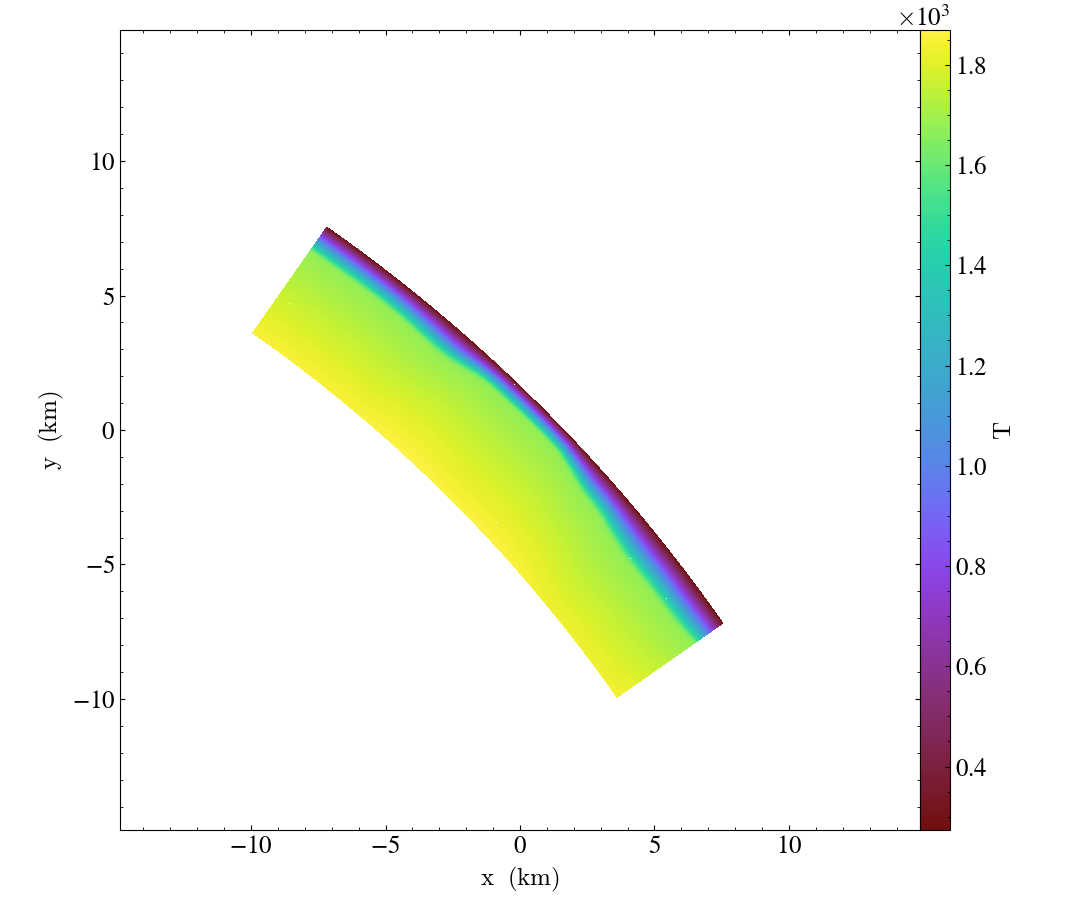

In [35]:
p=yt.SlicePlot(ds2, "z", ("all", "T"))
p.set_log("T",False)
p.show()

## importing multiple fields 

up to here, we've only touched the `T` field for brevity. So here's a class that condenses all the above information while including all available fields:

In [36]:
import xmltodict,meshio,os, numpy as np
class pvuFile(object):
    def __init__(self,file,**kwargs):
        self.file=file 
        self.dataDir=kwargs.get('dataDir',os.path.split(file)[0])
        with open(file) as data:
            self.pXML = xmltodict.parse(data.read())
            
        # store fields for convenience 
        self.fields=self.pXML['VTKFile']['PUnstructuredGrid']['PPointData']['PDataArray']        
            
    def load(self):                      
    
        conlist=[]  # list of 2D connectivity arrays 
        coordlist=[] # global, concatenated coordinate array 
        nodeDictList=[] # list of node_data dicts, same length as conlist 

        con_offset=-1
        for mesh_id,src in enumerate(self.pXML['VTKFile']['PUnstructuredGrid']['Piece']):    
            mesh_name="connect{meshnum}".format(meshnum=mesh_id+1) # connect1, connect2, etc.            
            srcFi=os.path.join(self.dataDir,src['@Source']) # full path to .vtu file 
            
            [con,coord,node_d]=self.loadPiece(srcFi,mesh_name,con_offset+1)                        
            con_offset=con.max() 
            
            conlist.append(con.astype("i8"))
            coordlist.extend(coord.astype("f8"))
            nodeDictList.append(node_d)
            
        self.connectivity=conlist
        self.coordinates=np.array(coordlist)
        self.node_data=nodeDictList
            
    def loadPiece(self,srcFi,mesh_name,connectivity_offset=0): 

        meshPiece=meshio.read(srcFi) # read it in with meshio     
        coords=meshPiece.points # coords and node_data are already global
        connectivity=meshPiece.cells_dict['hexahedron'] # 2D connectivity array 

        # parse node data 
        node_data=self.parseNodeData(meshPiece.point_data,connectivity,mesh_name)

        # offset the connectivity matrix to global value 
        connectivity=np.array(connectivity)+connectivity_offset

        return [connectivity,coords,node_data]
    
    def parseNodeData(self,point_data,connectivity,mesh_name):
        
        # for each field, evaluate field data by index, reshape to match connectivity 
        con1d=connectivity.ravel() 
        conn_shp=connectivity.shape 
        
        comp_hash={0:'cx',1:'cy',2:'cz'}
        def rshpData(data1d):
            return np.reshape(data1d[con1d],conn_shp)
            
        node_data={}        
        for fld in self.fields: 
            nm=fld['@Name']
            if nm in point_data.keys():
                if '@NumberOfComponents' in fld.keys() and int(fld['@NumberOfComponents'])>1:
                    # we have a vector, deal with components
                    for component in range(int(fld['@NumberOfComponents'])): 
                        comp_name=nm+'_'+comp_hash[component] # e.g., velocity_cx 
                        m_F=(mesh_name,comp_name) # e.g., ('connect1','velocity_cx')
                        node_data[m_F]=rshpData(point_data[nm][:,component])
                else:
                    # just a scalar! 
                    m_F=(mesh_name,nm) # e.g., ('connect1','T')
                    node_data[m_F]=rshpData(point_data[nm])
    
        return node_data      


In [37]:
pFile=os.path.join(DataDir,'solution-00015.pvtu')
pvuData=pvuFile(pFile)
print(pvuData.fields)
pvuData.load()
pvuData.node_data

[OrderedDict([('@type', 'Float64'), ('@Name', 'velocity'), ('@NumberOfComponents', '3'), ('@format', 'ascii')]), OrderedDict([('@type', 'Float64'), ('@Name', 'p'), ('@format', 'ascii')]), OrderedDict([('@type', 'Float64'), ('@Name', 'T'), ('@format', 'ascii')]), OrderedDict([('@type', 'Float64'), ('@Name', 'crust'), ('@format', 'ascii')]), OrderedDict([('@type', 'Float64'), ('@Name', 'mantle_lithosphere'), ('@format', 'ascii')]), OrderedDict([('@type', 'Float64'), ('@Name', 'viscosity'), ('@format', 'ascii')]), OrderedDict([('@type', 'Float64'), ('@Name', 'density'), ('@format', 'ascii')]), OrderedDict([('@type', 'Float64'), ('@Name', 'strain_rate'), ('@format', 'ascii')]), OrderedDict([('@type', 'Float64'), ('@Name', 'velocity_inclination'), ('@format', 'ascii')])]


[{('connect1',
   'velocity_cx'): array([[ 0.00000000e+00, -6.80551966e-05, -3.19140003e-04, ...,
          -1.10311172e-04, -3.60070931e-04, -3.03710025e-04],
         [-6.80551966e-05, -1.36577248e-04, -3.72298004e-04, ...,
          -1.77516617e-04, -4.12034657e-04, -3.60070931e-04],
         [-2.64470727e-04, -3.19140003e-04, -4.88190999e-04, ...,
          -3.60070931e-04, -5.27006108e-04, -4.99197748e-04],
         ...,
         [ 1.49819325e-03,  1.51003664e-03,  1.43531710e-03, ...,
           1.44963851e-03,  1.36882637e-03,  1.36969867e-03],
         [ 1.42217637e-03,  1.43217144e-03,  1.40730455e-03, ...,
           1.36969867e-03,  1.33584696e-03,  1.33620575e-03],
         [ 1.43217144e-03,  1.43531710e-03,  1.40174013e-03, ...,
           1.36882637e-03,  1.32902991e-03,  1.33584696e-03]]),
  ('connect1',
   'velocity_cy'): array([[ 0.00000000e+00, -4.76527639e-05,  3.32709256e-04, ...,
          -7.72407147e-05,  3.02485132e-04,  3.44300584e-04],
         [-4.76527639e-0

In [38]:
import yt
ds4 = yt.load_unstructured_mesh(
    pvuData.connectivity,
    pvuData.coordinates,
    node_data = pvuData.node_data
)  

yt : [INFO     ] 2020-07-02 10:39:24,199 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-07-02 10:39:24,199 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-07-02 10:39:24,199 Parameters: domain_left_edge          = [ 2679220.40116885  2679220.40116884 -3272029.00399254]
yt : [INFO     ] 2020-07-02 10:39:24,200 Parameters: domain_right_edge         = [5653600.91489411 5653600.91489411 -736270.69874229]
yt : [INFO     ] 2020-07-02 10:39:24,200 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2020-07-02 10:39:24,427 xlim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:24,428 ylim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:24,428 xlim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:24,428 ylim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:24,429 Making a fixed resolution buffer of (('all', 'T')) 800 by 800



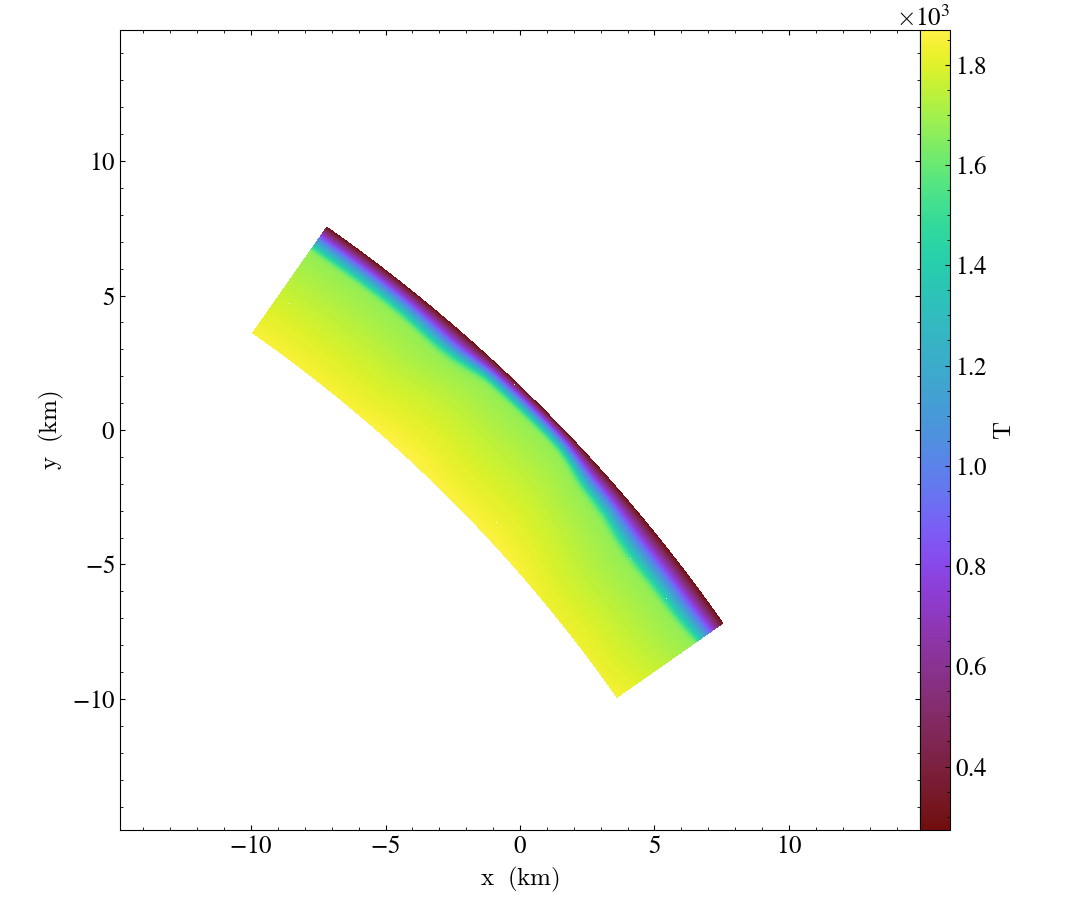

In [39]:
p=yt.SlicePlot(ds4, "z", ("all", "T"))
p.set_log("T",False)
p.show()

yt : [INFO     ] 2020-07-02 10:39:25,018 xlim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:25,019 ylim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:25,019 xlim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:25,020 ylim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:25,020 Making a fixed resolution buffer of (('all', 'viscosity')) 800 by 800
/home/chavlin/miniconda3/envs/yt_dev/lib/python3.8/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0



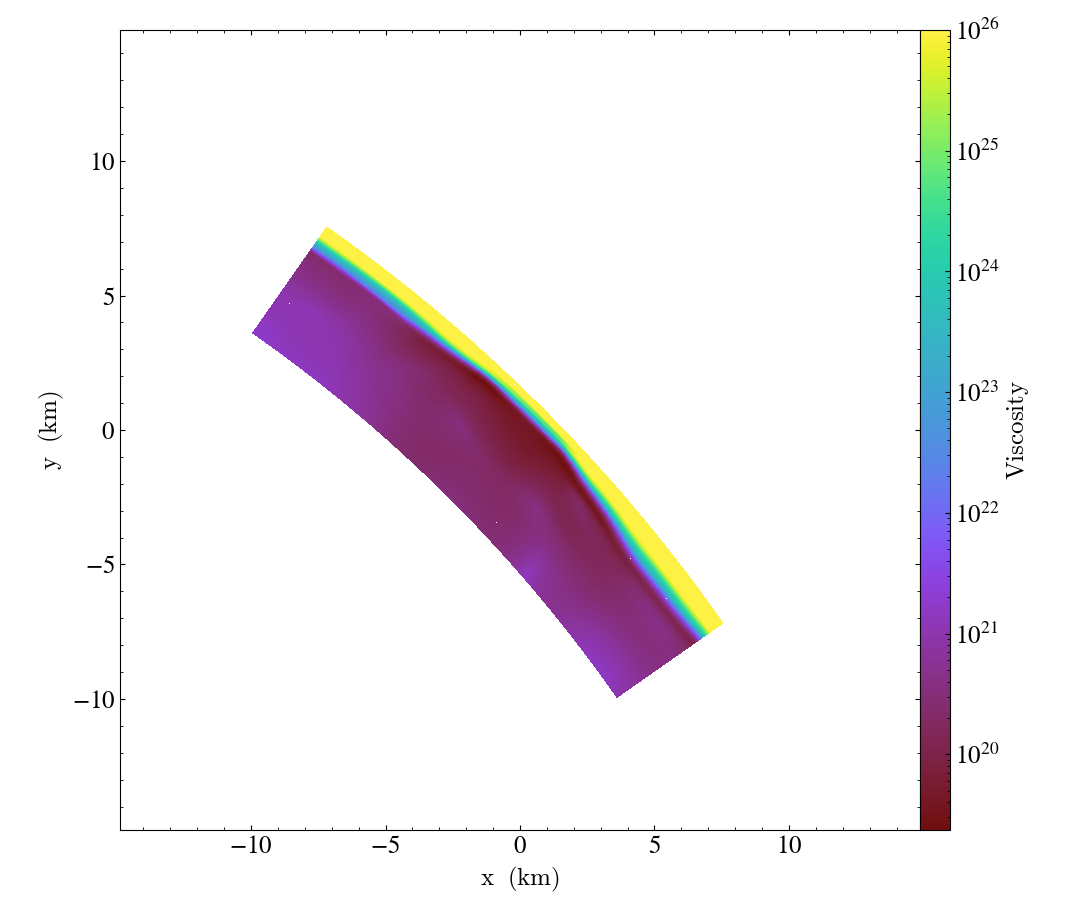

In [40]:
p=yt.SlicePlot(ds4, "z", ("all", "viscosity"))
p.show()

yt : [INFO     ] 2020-07-02 10:39:25,827 xlim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:25,827 ylim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:25,828 xlim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:25,828 ylim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:25,829 Making a fixed resolution buffer of (('all', 'mantle_lithosphere')) 800 by 800
yt : [WARNING  ] 2020-07-02 10:39:26,122 Plot image for field ('all', 'mantle_lithosphere') has both positive and negative values. Min = -0.039544, Max = 1.020943.
yt : [WARNING  ] 2020-07-02 10:39:26,122 Switching to symlog colorbar scaling unless linear scaling is specified later
/home/chavlin/src/yt/yt/visualization/base_plot_types.py:205: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(



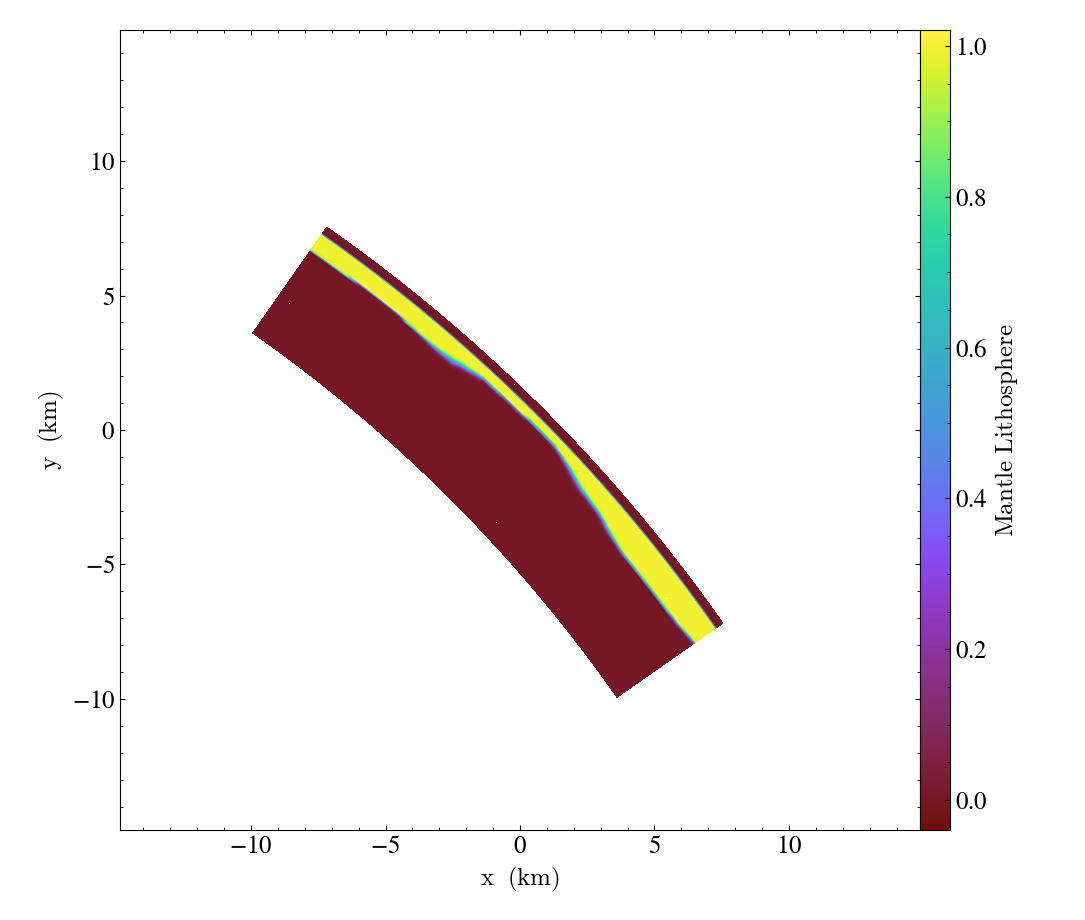

In [41]:
p=yt.SlicePlot(ds4, "z", ("all", "mantle_lithosphere"))
p.set_log("mantle_lithosphere",False)
p.show()

yt : [INFO     ] 2020-07-02 10:39:26,442 xlim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:26,442 ylim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:26,443 xlim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:26,444 ylim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:26,444 Making a fixed resolution buffer of (('all', 'velocity_inclination')) 800 by 800
yt : [WARNING  ] 2020-07-02 10:39:26,731 Plot image for field ('all', 'velocity_inclination') has both positive and negative values. Min = -89.047545, Max = 89.293706.
yt : [WARNING  ] 2020-07-02 10:39:26,732 Switching to symlog colorbar scaling unless linear scaling is specified later
/home/chavlin/src/yt/yt/visualization/base_plot_types.py:205: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(



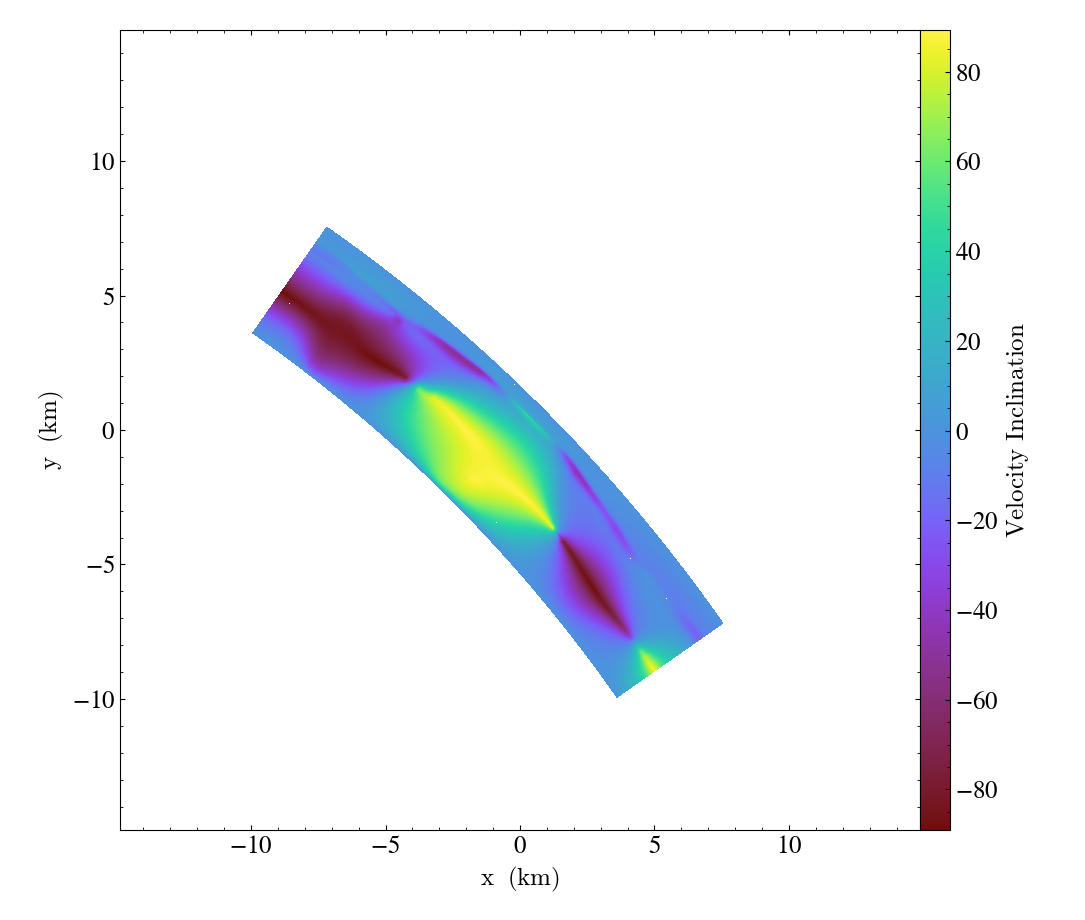

In [42]:
p=yt.SlicePlot(ds4, "z", ("all", "velocity_inclination"))
p.set_log("velocity_inclination",False)
p.show()

yt : [INFO     ] 2020-07-02 10:39:27,099 xlim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:27,099 ylim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:27,100 xlim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:27,100 ylim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:27,101 Making a fixed resolution buffer of (('all', 'strain_rate')) 800 by 800
/home/chavlin/miniconda3/envs/yt_dev/lib/python3.8/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0



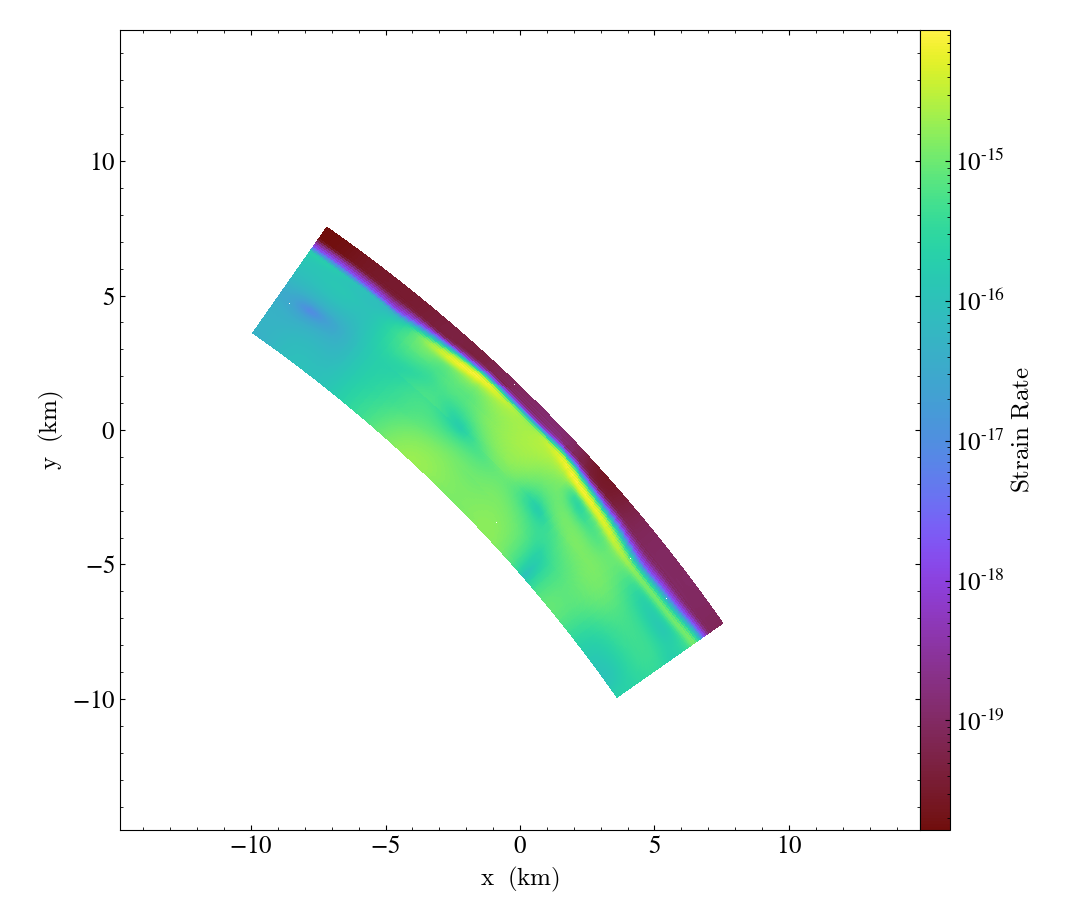

In [43]:
p=yt.SlicePlot(ds4, "z", ("all", "strain_rate"))
p.show()

yt : [INFO     ] 2020-07-02 10:39:27,777 xlim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:27,778 ylim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:27,778 xlim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:27,779 ylim = 2679220.401169 5653600.914894
yt : [INFO     ] 2020-07-02 10:39:27,779 Making a fixed resolution buffer of (('all', 'velocity_cx')) 800 by 800
yt : [WARNING  ] 2020-07-02 10:39:28,061 Plot image for field ('all', 'velocity_cx') has both positive and negative values. Min = -0.003559, Max = 0.005783.
yt : [WARNING  ] 2020-07-02 10:39:28,061 Switching to symlog colorbar scaling unless linear scaling is specified later
/home/chavlin/src/yt/yt/visualization/base_plot_types.py:205: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(



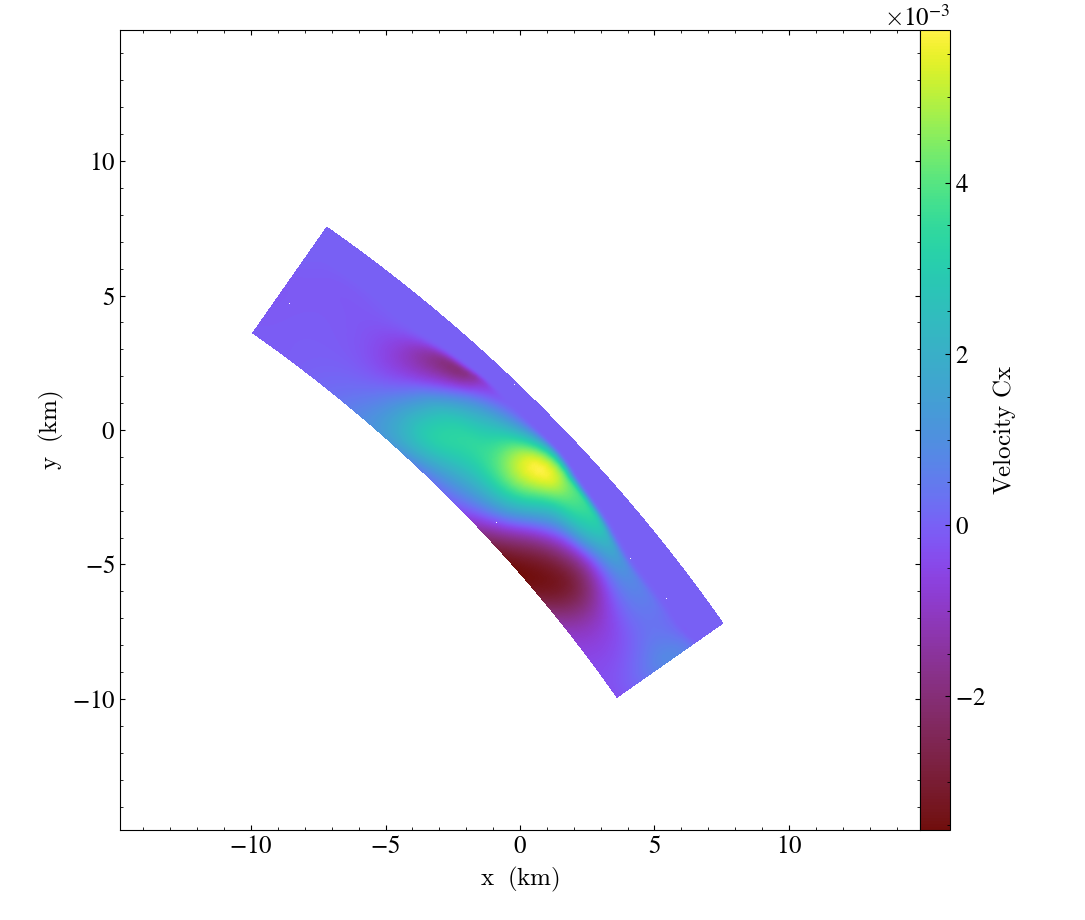

In [44]:
p=yt.SlicePlot(ds4, "z", ("all", "velocity_cx"))
p.set_log("velocity_cx",False)
p.show()

Remaining issues: 
    
* velocity naming -- needed to add Cx to avoid error (gas,velocity) exists
* units -- not dealing with them, some wonky axes on these plots 
* resolve 'connect1','connect2' vs 'all' 